In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# définition les noms des colonnes
colonnes = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [4]:
# Ouverture du fichier
data_full = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', header=None, names=colonnes)

In [5]:
# RECHERCHE DE THEMES LDA - NON UTILISE (temps de traitement 10h)
# import pandas as pd
# import gensim
# from gensim import corpora
# from gensim.models import CoherenceModel
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer, SnowballStemmer
# import nltk
# import re

# # Télécharger les ressources nécessaires de NLTK
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Charger les données

# texts = data_full['text'].values

# # Prétraitement des données
# stop_words = set(stopwords.words('english'))
# stemmer = SnowballStemmer('english')

# def preprocess(text):
#     result = []
#     for token in gensim.utils.simple_preprocess(text):
#         if token not in stop_words and len(token) > 3:
#             result.append(stemmer.stem(WordNetLemmatizer().lemmatize(token, pos='v')))
#     return result

# processed_texts = [preprocess(text) for text in texts]

# # Créer un dictionnaire et un corpus
# dictionary = corpora.Dictionary(processed_texts)
# corpus = [dictionary.doc2bow(text) for text in processed_texts]

# # Déterminer le nombre optimal de topics
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = gensim.models.LdaModel(corpus=corpus,
#                                        id2word=dictionary,
#                                        num_topics=num_topics,
#                                        random_state=100,
#                                        update_every=1,
#                                        chunksize=100,
#                                        passes=10,
#                                        alpha='auto',
#                                        per_word_topics=True)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())
#     return model_list, coherence_values

# model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_texts, start=2, limit=40, step=6)

# # Sélectionner le modèle avec la meilleure cohérence
# optimal_model = model_list[coherence_values.index(max(coherence_values))]

# # Afficher les topics
# topics = optimal_model.print_topics(num_words=10)
# for topic in topics:
#     print(topic)

# # Détecter le topic traitant des voyages en avion
# def find_air_travel_topic(model, dictionary):
#     for idx, topic in model.print_topics(-1):
#         if 'flight' in topic or 'airline' in topic or 'airport' in topic:
#             print(f"Topic {idx}: {topic}")

# find_air_travel_topic(optimal_model, dictionary)


On sélectionne les tweets par mots-clés relatifs au transport aérien afin d'avoir un jeu de données adapté au métier.

In [6]:
import pandas as pd
import re

# Liste de mots-clés spécifiques au domaine de l'aviation
keywords = [
    'flight', 'airline', 'plane', 'airport', 'boarding', 'delay', 'baggage', 
    'crew', 'steward', 'check-in', 'boarding pass', 'gate', 'luggage', 'landed'
    'overbooked', 'turbulence', 'landing', 'takeoff', 'in-flight', 'cabin crew', 
    'air hostess', 'air steward', 'seatbelt', 'emergency exit', 'runway', 
    'air traffic control', 'lost baggage', 'missed connection', 'upgrade', 
    'frequent flyer', 'mileage', 'layover', 'diverted', 'grounded'
]

# Construire une expression régulière pour correspondre uniquement aux mots entiers
pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

# Filtrer les tweets contenant les mots-clés
data_filtered = data_full[data_full['text'].str.contains(pattern, case=False, na=False, regex=True)]

# Exclure les tweets contenant des mots indésirables (homonymes)
exclude_pattern = r'\b(?:screwed|screw)\b'
data_filtered = data_filtered[~data_filtered['text'].str.contains(exclude_pattern, case=False, na=False, regex=True)]

# Nombre de tweets spécifiques au domaine des voyages aériens
print("Le dataset contient", data_filtered.shape[0], "tweets relatifs au transport aérien")


Le dataset contient 9460 tweets relatifs au transport aérien


In [7]:
import pandas as pd

# Filtrer les lignes avec target=0 et target=4
target_0 = data_filtered[data_filtered['target'] == 0]
target_4 = data_filtered[data_filtered['target'] == 4]

# Trouver le nombre minimum de lignes entre les deux groupes
min_count = min(len(target_0), len(target_4))

# Échantillonner un nombre égal de lignes de chaque groupe
sampled_target_0 = target_0.sample(n=min_count, random_state=42)
sampled_target_4 = target_4.sample(n=min_count, random_state=42)

# Combiner les échantillons
data = pd.concat([sampled_target_0, sampled_target_4])

# Nombre de tweets spécifiques au domaine des voyages aériens
print("Le dataset équilibré contient", data.shape[0], "tweets")

Le dataset équilibré contient 6588 tweets


In [8]:
# Ajuster la largeur maximale des colonnes
pd.set_option('display.max_colwidth', None)
data.sample(10)

,target,ids,date,flag,user,text
1102058,4,1970891592,Sat May 30 05:34:03 PDT 2009,NO_QUERY,terenceb,"Ha ha, 'Flight of the Concords' cracks me up"
269413,0,1989611045,Mon Jun 01 02:10:12 PDT 2009,NO_QUERY,clarkskonhcky,its 4 am and im awake taking my mom and brother to the airport so they can go home
1190152,4,1983660216,Sun May 31 13:35:05 PDT 2009,NO_QUERY,shayera,"@MoriahJovan i've got plenty of time before my flight, so i should be all right. i'm used to being so clumsy."
651493,0,2237909551,Fri Jun 19 06:32:38 PDT 2009,NO_QUERY,KManCOBHC,"Sit'n at the airport, bored and have the damn munchies"
572834,0,2209567517,Wed Jun 17 10:32:16 PDT 2009,NO_QUERY,_missJP,why am i looking forward to work?? lol weeeeird. but i have to wait til next fri to book my flight lets hope prices dont jump!
283284,0,1992862491,Mon Jun 01 09:26:39 PDT 2009,NO_QUERY,firioo,I feel sorry for the missing Air France plane.. Hope everything will be sorted out very soon.
830753,4,1557349262,Sun Apr 19 03:33:45 PDT 2009,NO_QUERY,LaurenFisher,@alancostello Lovely to meet you too. So pleased I'm part of the crew!(your words I think). What do I get?
1006156,4,1880581479,Fri May 22 01:45:14 PDT 2009,NO_QUERY,zoesstuff,GOOOD MORNING!! where ever its morning lol ...Want to know what it's like to be in a British boarding school in the Cotswolds? Just ask
964352,4,1827518159,Sun May 17 10:52:51 PDT 2009,NO_QUERY,ndnchick,Janis Joplin - Leaving on a Jet Plane ~ I'm leaving tonight! I'll see you all Friday! ? http://blip.fm/~6h1u6
1388400,4,2053021637,Sat Jun 06 02:57:51 PDT 2009,NO_QUERY,robwegner,"Hello America, Wegners and Gene have landed safely in London. Crying baby on flight gave us the opportunity to practice patience."


In [9]:
print("Exemples de 5 tweets négatifs :\n")
for tweet in data[data["target"] == 0]["text"].head(5).tolist():
    print(tweet)
    print()

Exemples de 5 tweets négatifs :

Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it. 

Waiting at the airport with the hubby this morning. 1 hour till his flight leaves 

OH WOW FAIL. My thoughts are with all those of the Air France flight and their families 

Off to the airport!  Dallas here I come!

Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket.  iPhones are shitty!!!!!



In [10]:
print("Exemples de 5 tweets négatifs :\n")
for tweet in data[data["target"] == 0]["text"].head(5).tolist():
    print(tweet)
    print()

Exemples de 5 tweets négatifs :

Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it. 

Waiting at the airport with the hubby this morning. 1 hour till his flight leaves 

OH WOW FAIL. My thoughts are with all those of the Air France flight and their families 

Off to the airport!  Dallas here I come!

Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket.  iPhones are shitty!!!!!



Ce sont des contenus typiques de tweets: citation (@), liens, utilisation d'abbréviations et de variations d'orthographe, ponctuation pour exprimer les sentiments <br>


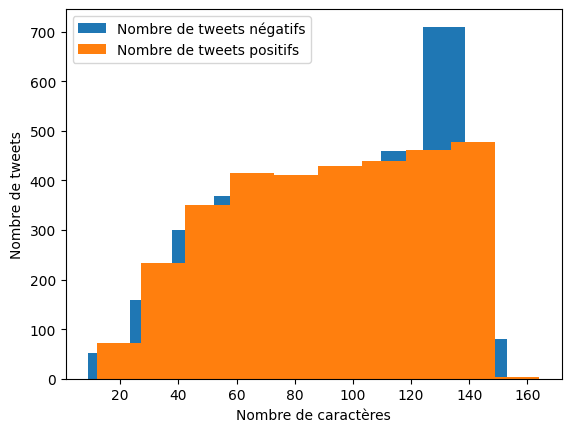

In [11]:
# Longueur des tweets
length_text_pos = data[data["target"] == 4]["text"].str.len()
length_text_neg = data[data["target"] == 0]["text"].str.len() 
plt.hist(length_text_neg, label="Nombre de tweets négatifs") 
plt.hist(length_text_pos, label="Nombre de tweets positifs") 
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre de tweets")
plt.legend() 
plt.show()

Le format tweet autorise au plus 280 caractères: Les messages dépassent rarement 150 avec une concentration particulière pour les tweets négatifs vers 130.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6588 entries, 364415 to 1570686
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  6588 non-null   int64 
 1   ids     6588 non-null   int64 
 2   date    6588 non-null   object
 3   flag    6588 non-null   object
 4   user    6588 non-null   object
 5   text    6588 non-null   object
dtypes: int64(2), object(4)
memory usage: 360.3+ KB


In [13]:
print(data.isna().sum())

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


Il n'y a pas de valeurs manquantes

In [14]:
data.nunique()

target       2
ids       6582
date      6543
flag         1
user      6279
text      6562
dtype: int64

On note que la plupart des utilisateurs ont posté un seul tweet. Pour ceux ayant posté plus d'un tweet la répartition du nombre de tweets est la suivante:

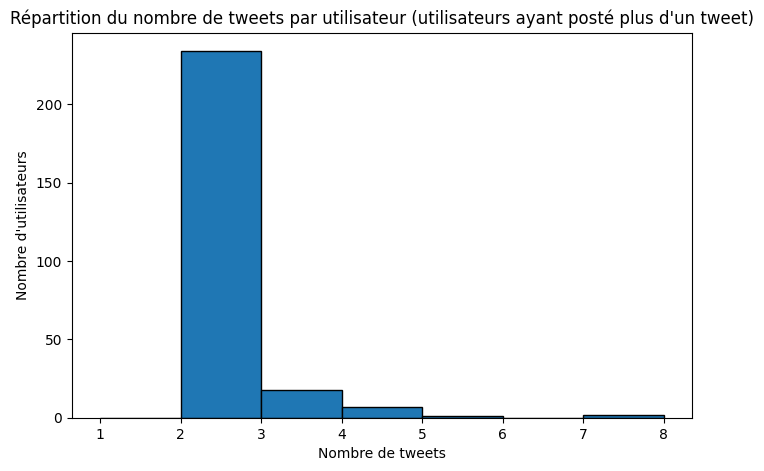

In [15]:
# Compter le nombre de tweets par utilisateur
user_tweet_counts = data['user'].value_counts()

# Filtrer les utilisateurs ayant posté plus d'un tweet
user_tweet_counts = user_tweet_counts[user_tweet_counts > 1]

# Tracer l'histogramme
plt.figure(figsize=(8, 5))
plt.hist(user_tweet_counts, bins=range(1, user_tweet_counts.max() + 1), edgecolor='black')
plt.title("Répartition du nombre de tweets par utilisateur (utilisateurs ayant posté plus d'un tweet)")
plt.xlabel("Nombre de tweets")
plt.ylabel("Nombre d'utilisateurs")
plt.xticks(range(1, user_tweet_counts.max() + 1))
plt.show()

In [16]:
for col in data.columns:
    n = data.duplicated(subset=col).sum()
    print(f'col : {col} -> duplicated : {n}')

col : target -> duplicated : 6586
col : ids -> duplicated : 6
col : date -> duplicated : 45
col : flag -> duplicated : 6587
col : user -> duplicated : 309
col : text -> duplicated : 26


On trouve des doublons (ids, date, user, text) qu'il faut examiner et éliminer lorsqu'il s'agit de la même information répétée.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trouver les doublons basés sur la colonne 'ids'
duplicates = data[data.duplicated(subset=['ids'], keep=False)]
display(duplicates.sort_values(by="ids"))

# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates.groupby('ids')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)


,target,ids,date,flag,user,text
42578,0,1676160753,Fri May 01 21:15:30 PDT 2009,NO_QUERY,littletigr,@aneetasee no not after that plane ticket BUT I'm super excited to see the fam after three years
859693,4,1676160753,Fri May 01 21:15:30 PDT 2009,NO_QUERY,littletigr,@aneetasee no not after that plane ticket BUT I'm super excited to see the fam after three years
235348,0,1979765929,Sun May 31 04:25:06 PDT 2009,NO_QUERY,lasic,"@jabogan LOL, why creepy? ok with me... bummer, school Moodle is down prob'ly due to upgrade at DET this w'end - back Tue, sorry"
1164524,4,1979765929,Sun May 31 04:25:06 PDT 2009,NO_QUERY,lasic,"@jabogan LOL, why creepy? ok with me... bummer, school Moodle is down prob'ly due to upgrade at DET this w'end - back Tue, sorry"
316351,0,2002387780,Tue Jun 02 04:03:52 PDT 2009,NO_QUERY,SilviaEmilia,"flying back to Germany today..already miss home feels like I am going to cry until boarding time...well, see u tomorrow"
1287627,4,2002387780,Tue Jun 02 04:03:52 PDT 2009,NO_QUERY,SilviaEmilia,"flying back to Germany today..already miss home feels like I am going to cry until boarding time...well, see u tomorrow"
379890,0,2052444682,Sat Jun 06 00:45:08 PDT 2009,NO_QUERY,ReMisterGeneral,@ChrissyMBot no tetleys at the airport I shall have to sample 'american breakfast tea'. Heaven forbid
1382193,4,2052444682,Sat Jun 06 00:45:08 PDT 2009,NO_QUERY,ReMisterGeneral,@ChrissyMBot no tetleys at the airport I shall have to sample 'american breakfast tea'. Heaven forbid
442028,0,2067161979,Sun Jun 07 11:51:35 PDT 2009,NO_QUERY,Morenah08,"I'll go Skate Boarding Down My House! But...I'm sad, One person isn't with me now! s2"
1481909,4,2067161979,Sun Jun 07 11:51:35 PDT 2009,NO_QUERY,Morenah08,"I'll go Skate Boarding Down My House! But...I'm sad, One person isn't with me now! s2"


Valeurs uniques de la colonne 'target' : [4]


En faisant la somme des target sur les lignes en doublons on a uniquement la valeur "4" ce qui veut dire que c'est le résultat de 0+4 donc ce sont des tweets ayant le même identifiant mais ont été jugés à la fois positifs et négatifs, autant les supprimer.

In [19]:
# Trouver les doublons basés sur toutes les colonnes SAUF 'target'
duplicates = data[data.duplicated(subset=['ids', 'date', 'flag', 'user', 'text'], keep=False)]

# Supprimer les doublons
data = data.drop(duplicates.index)

In [20]:
# Trouver les doublons basés sur les colonnes date, flag, user, text, ET target (ids sera différent)
duplicates_text_target = data[data.duplicated(subset=['date', 'flag', 'user', 'text', 'target'], keep=False)]
# Il n'y a pas de contradiction sur la valeur du sentiment => on garde le premier
data = data.drop_duplicates(subset=['date', 'flag', 'user', 'text', 'target'], keep='first')
duplicates_text_target

,target,ids,date,flag,user,text
291475,0,1995715901,Mon Jun 01 13:56:04 PDT 2009,NO_QUERY,carolsantini,well i'm feeling sad for the family of who were in Air France plane that disappear im so sorry !
291477,0,1995715937,Mon Jun 01 13:56:04 PDT 2009,NO_QUERY,carolsantini,well i'm feeling sad for the family of who were in Air France plane that disappear im so sorry !
1418769,4,2057837639,Sat Jun 06 13:45:25 PDT 2009,NO_QUERY,PastorJonCannon,"Monitor at Chicago aiport says my flight to Raliegh, NC is &quot;on time&quot; - pray that it stays that way!"
1418768,4,2057837598,Sat Jun 06 13:45:25 PDT 2009,NO_QUERY,PastorJonCannon,"Monitor at Chicago aiport says my flight to Raliegh, NC is &quot;on time&quot; - pray that it stays that way!"


In [21]:
# Trouver les doublons basés sur les colonnes flag, user, text
duplicates_text_user = data[data.duplicated(subset=['flag', 'user', 'text'], keep=False)]
duplicates_text_user

,target,ids,date,flag,user,text
1372325,4,2051242027,Fri Jun 05 21:17:51 PDT 2009,NO_QUERY,PatrickAnna,http://www.twitpic.com/48mky Anna &amp; her brother Albert enjoying the view while flying without a plane...
1386767,4,2052865326,Sat Jun 06 02:19:45 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://short.to/dlnc
1454778,4,2063355857,Sun Jun 07 02:19:41 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://short.to/dlnc
1446052,4,2062459855,Sat Jun 06 23:17:39 PDT 2009,NO_QUERY,PatrickAnna,http://www.twitpic.com/48mky Anna &amp; her brother Albert enjoying the view while flying without a plane...
1202739,4,1985909234,Sun May 31 18:00:16 PDT 2009,NO_QUERY,PatrickAnna,Anna and her brother Albert were about to jump out of the plane... http://twitpic.com/3i493
858086,4,1574066791,Tue Apr 21 04:06:41 PDT 2009,NO_QUERY,PatrickAnna,Anna and her brother Albert were about to jump out of the plane... http://twitpic.com/3i493
845589,4,1564251142,Mon Apr 20 02:33:09 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://twitpic.com/3i44g
846153,4,1564349281,Mon Apr 20 03:03:08 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://twitpic.com/3i44g


In [22]:
# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)

Valeurs uniques de la colonne 'target' : [8]


Certains messages sont répétés un grand nombre de fois par le même utilisateur. Il n'y a pas de contradiction sur les valeurs de sentiment mais cela créé une emphase sur ces expressions alors que la raison de ces posts multiples peut être simplement un problème technique

In [23]:
# Supprimer les doublons
data = data.drop(duplicates_text_user.index)

Il y a aussi le cas des messages identiques postés par des utilisateurs (apparemment) distincts à des moments similaires ou très différents. En l'absence d'information on va les garder sauf si les étiquettes de sentiments sont contradictoires (la somme de target devra être soit 0 soit 8)

In [24]:
# Trouver les doublons basés sur les colonnes text
duplicates_text = data[data.duplicated(subset=['text'], keep=False)]
duplicates_text

,target,ids,date,flag,user,text
307389,0,2000460643,Mon Jun 01 22:09:58 PDT 2009,NO_QUERY,rachelslott,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families
319656,0,2003104662,Tue Jun 02 05:53:18 PDT 2009,NO_QUERY,houseplanet,AIR FRANCE FLIGHT 447 --Brazilian Air Force confirms a plane seat was found 650km NE of Fernando de Noronha
202006,0,1972027290,Sat May 30 08:24:29 PDT 2009,NO_QUERY,jediabe,On my way to the airport
14963,0,1553925555,Sat Apr 18 15:35:18 PDT 2009,NO_QUERY,Andrestwoo,Grounded
233890,0,1979467276,Sun May 31 03:10:20 PDT 2009,NO_QUERY,BeebaDiva,On my way to the airport
770027,0,2301851016,Tue Jun 23 15:59:59 PDT 2009,NO_QUERY,benbrochill,Going to mcdonalds. I miss annet and the crew.
770066,0,2301863291,Tue Jun 23 16:00:51 PDT 2009,NO_QUERY,Adolfh71,Going to mcdonalds. I miss annet and the crew.
319863,0,2003152114,Tue Jun 02 05:59:15 PDT 2009,NO_QUERY,jacobowsky,AIR FRANCE FLIGHT 447 --Brazilian Air Force confirms a plane seat was found 650km NE of Fernando de Noronha
401717,0,2057746687,Sat Jun 06 13:35:05 PDT 2009,NO_QUERY,123fund,At the airport.
475933,0,2177742119,Mon Jun 15 06:37:38 PDT 2009,NO_QUERY,zacharypatchan,on the way to the airport


In [25]:
# Groupby sur 'text' et calculer l'écart type sur les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].std().reset_index()

In [26]:
grouped_data.target.unique()

array([0.])

Text(0.5, 1.0, 'Histogramme des valeurs de Target et de leurs fréquences')

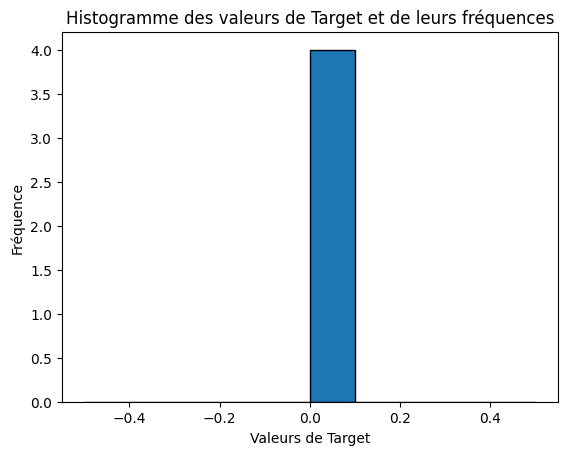

In [27]:
import matplotlib.pyplot as plt

# Créer un histogramme des valeurs de grouped_data.target
plt.hist(grouped_data['target'], bins=10, edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Valeurs de Target')
plt.ylabel('Fréquence')
plt.title('Histogramme des valeurs de Target et de leurs fréquences')

In [28]:
# Filtrer les textes dans grouped_data où target n'est pas nul
non_zero_texts = grouped_data[grouped_data['target'] != 0]['text']

# Supprimer les lignes dans data où 'text' est dans non_zero_texts
data = data[~data['text'].isin(non_zero_texts)]

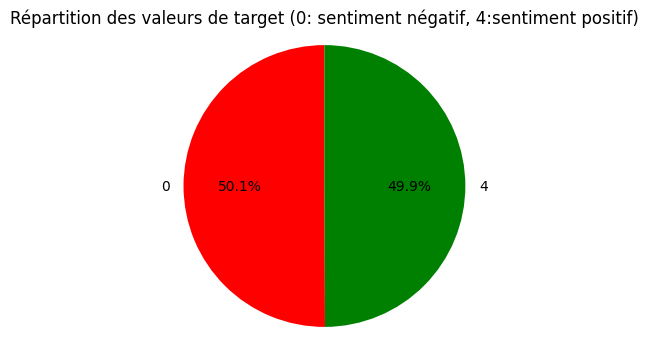

In [29]:
# Répartition des valeurs de la colonne 'target'
repartition_target = data['target'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(repartition_target, labels=repartition_target.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Répartition des valeurs de target (0: sentiment négatif, 4:sentiment positif)')
plt.axis('equal')  # Pour s'assurer que le pie chart est bien circulaire
plt.show()

On a préservé l'équilibre des données.

## Problématique métier
Le client demande de détecter les bad buzz, lors de l'appréciation de performance du modèle.
Dans un souci de conformité avec les pratiques et les règles de scikit-learn nous allons modifier les valeurs de target afin que l'occurence d'un sentiment négatif (actuellement 0) génère la classe 1 (détection de l'événement recherché). Comme les classes sont équilibrées on basera l'optimisation sur l'accuracy (exactitude de prédiction). Pour des modèles de performances proches on pourra chosir la métrique qui nous permettra de minimiser les faux négatifs: ce sont des sentiments négatifs (classe 1 réelle) qui sont interprétés par l'algorithme comme des sentiments positifs (classe 0).
On s'interressera donc principalement au rappel et dans une moindre mesure à F1 (moyenne harmonique entre faux négatifs et vrais positifs).

In [30]:
# Sauvegarde des valeurs initiales des scores de sentiment
data['sentiment_score'] = data['target']

La valeur du score de sentiment de 0 ou 4 porte à confusion, on va changer pour 1

In [31]:
# modifier data['target'] pour que les valeurs 4 deviennent 0 et les valeurs 0 deviennent 1
data['target'] = data['target'].replace({4: 0, 0: 1})

In [32]:
# Sauvegarder les tweets filtrés dans un nouveau fichier CSV
data.to_csv('./data/filtered_tweets.csv', index=True)

## Exploration et nettoyage du vocabulaire

### Détection de la langue

In [33]:
# ! pip install spacy-langdetect
# A effectuer dans le terminal python -m spacy download en_core_web_sm
! python --version
# ! pip install tqdm

Python 3.11.11


In [37]:
import pandas as pd
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language
from tqdm import tqdm

# Fonction pour ajouter le détecteur de langue à spaCy
def get_lang_detector(nlp, name):
    return LanguageDetector()

# Charger le modèle de langue anglais
nlp = spacy.load("en_core_web_sm")

# Vérifiez si l'usine existe déjà
if "language_detector" not in nlp.pipe_names:
    Language.factory("language_detector", func=get_lang_detector)
    nlp.add_pipe('language_detector', last=True)

# Fonction pour détecter la langue
def detect_language(text):
    doc = nlp(text)
    return doc._.language['language']

# Appliquer la détection de langue avec une barre de progression
tqdm.pandas()  # Activer tqdm pour les pandas DataFrame
data['language'] = data['text'].progress_apply(detect_language)
data = data[data['language'] == 'en']

# Supprimer la colonne 'language' si elle n'est plus nécessaire
data = data.drop(columns=['language'])

data.shape


100%|██████████| 6566/6566 [01:31<00:00, 71.58it/s]


(6474, 7)

On s'est restreint à la langue anglaise.

### Nettoyage (adapté aux tweets)

In [40]:
%time
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import sklearn

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk

print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("skearn version:", sklearn.__version__)
print("re version:", re.__version__)
print("nltk version:", nltk.__version__)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

CPU times: total: 0 ns
Wall time: 0 ns
Python version: 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
Version info.: sys.version_info(major=3, minor=11, micro=11, releaselevel='final', serial=0)
pandas version: 2.2.3
numpy version: 1.26.4
skearn version: 1.6.0
re version: 2.2.1
nltk version: 3.9.1


#### Données

Nous allons tester nos fonctions sur quelques lignes sélectionnées au hasard

In [41]:
import random

# Choisir dix indices au hasard
random_indices = random.sample(range(len(data)), 10)

# Créer un DataFrame avec les lignes sélectionnées
data_sample = data.iloc[random_indices]

# Afficher les lignes sélectionnées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text,sentiment_score
1090371,0,1969791710,Sat May 30 01:14:35 PDT 2009,NO_QUERY,Tops1962,@qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet,4
1521339,0,2176311355,Mon Jun 15 03:31:20 PDT 2009,NO_QUERY,funnymandan,I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine,4
421856,1,2062513098,Sat Jun 06 23:27:04 PDT 2009,NO_QUERY,ayende,"stayed up too late, now I am afraid of going to bed and missing my flight",0
604028,1,2221826343,Thu Jun 18 06:03:54 PDT 2009,NO_QUERY,LMStellaPR,"Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now",0
585406,1,2215611885,Wed Jun 17 18:22:30 PDT 2009,NO_QUERY,scmorgan,@willrich45 I was liking Mixero until it wanted to upgrade when I closed it...then I lost my groups. No fun to set those up again,0
286103,1,1993808152,Mon Jun 01 10:57:50 PDT 2009,NO_QUERY,swiftquist,@nansical-just heardâ¦ Everyone pray for the people on flight 447 &amp; their familiesâ¦. So scary (via @stephaniepratt),0
30799,1,1563860990,Mon Apr 20 00:36:15 PDT 2009,NO_QUERY,roybenjamin,Boarding. Bye bye Britain http://bit.ly/q23lz,0
397881,1,2056747039,Sat Jun 06 11:43:04 PDT 2009,NO_QUERY,CSSVT,@sandydemandy =O I wish I could just afford the verizon version flat out when it drops.....but I can't...and don't have an upgrade...,0
812845,0,1548615194,Fri Apr 17 21:27:28 PDT 2009,NO_QUERY,jodierecommends,picking up more party goers from the airport soon ... hope they know where to go from there,4
747535,1,2283682203,Mon Jun 22 12:56:20 PDT 2009,NO_QUERY,RachhhTGP,Escaping from the plane bc I'm too sad to leave. not really but I wish,0


In [42]:
import spacy

# Tokenisation avec Spacy# Charger le modèle de langue
nlp = spacy.load('en_core_web_sm')

# Tokeniser les textes
data_sample['tokens'] = data_sample['text'].apply(lambda x: [token.text for token in nlp(x)])

# Afficher les lignes sélectionnées et tokenisées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text,sentiment_score,tokens
1090371,0,1969791710,Sat May 30 01:14:35 PDT 2009,NO_QUERY,Tops1962,@qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet,4,"[@qikipedia, I, bet, they, ca, nt, wait, and, are, buying, up, cars, and, airline, tickets, as, I, tweet]"
1521339,0,2176311355,Mon Jun 15 03:31:20 PDT 2009,NO_QUERY,funnymandan,I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine,4,"[I, am, at, the, airport, picking, up, Granma, ., There, are, facemask, everywhere, !, !, !, I, forgot, to, bring, mine]"
421856,1,2062513098,Sat Jun 06 23:27:04 PDT 2009,NO_QUERY,ayende,"stayed up too late, now I am afraid of going to bed and missing my flight",0,"[stayed, up, too, late, ,, now, I, am, afraid, of, going, to, bed, and, missing, my, flight]"
604028,1,2221826343,Thu Jun 18 06:03:54 PDT 2009,NO_QUERY,LMStellaPR,"Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now",0,"[Am, frantic, ., have, 8, am, flight, to, Brisbane, tomorrow, ,, have, nt, packed, ,, have, 3, loads, of, washing, and, work, to, do, ., Son, sick, with, 39, degree, temp, now]"
585406,1,2215611885,Wed Jun 17 18:22:30 PDT 2009,NO_QUERY,scmorgan,@willrich45 I was liking Mixero until it wanted to upgrade when I closed it...then I lost my groups. No fun to set those up again,0,"[@willrich45, I, was, liking, Mixero, until, it, wanted, to, upgrade, when, I, closed, it, ..., then, I, lost, my, groups, ., No, fun, to, set, those, up, again]"
286103,1,1993808152,Mon Jun 01 10:57:50 PDT 2009,NO_QUERY,swiftquist,@nansical-just heardâ¦ Everyone pray for the people on flight 447 &amp; their familiesâ¦. So scary (via @stephaniepratt),0,"[@nansical, -, just, heardâ, ¦, Everyone, pray, for, the, people, on, flight, 447, &, amp, ;, their, familiesâ, ¦, ., So, scary, , (, via, @stephaniepratt, )]"
30799,1,1563860990,Mon Apr 20 00:36:15 PDT 2009,NO_QUERY,roybenjamin,Boarding. Bye bye Britain http://bit.ly/q23lz,0,"[Boarding, ., Bye, bye, Britain, , http://bit.ly/q23lz]"
397881,1,2056747039,Sat Jun 06 11:43:04 PDT 2009,NO_QUERY,CSSVT,@sandydemandy =O I wish I could just afford the verizon version flat out when it drops.....but I can't...and don't have an upgrade...,0,"[@sandydemandy, =, O, I, wish, I, could, just, afford, the, verizon, version, flat, out, when, it, drops, ....., but, I, can't, ..., and, do, n't, have, an, upgrade, ...]"
812845,0,1548615194,Fri Apr 17 21:27:28 PDT 2009,NO_QUERY,jodierecommends,picking up more party goers from the airport soon ... hope they know where to go from there,4,"[picking, up, more, party, goers, from, the, airport, soon, ..., hope, they, know, where, to, go, from, there]"
747535,1,2283682203,Mon Jun 22 12:56:20 PDT 2009,NO_QUERY,RachhhTGP,Escaping from the plane bc I'm too sad to leave. not really but I wish,0,"[Escaping, from, the, plane, bc, I, 'm, too, sad, to, leave, ., , not, really, but, I, wish]"


In [43]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt_tab')


def count_total_tokens(data_sample, col):
    total_tokens = 0
    for text in data_sample[col]:
        tokens = word_tokenize(text)
        total_tokens += len(tokens)
    print("Nombre total de tokens :", total_tokens)
    return total_tokens

In [44]:
count_total_tokens(data_sample, "text")

Nombre total de tokens : 212


212

#### Fonctions

In [45]:
# pip install colorama
# Afficher les textes d'origine et les textes modifiés (en bleu)
from colorama import Fore, Style, init

def display_texts(data_sample, col1, col2):
    for original, cleaned in zip(data_sample[col1], data_sample[col2]):
        print(f"Original: {original}")
        print(f"{Fore.BLUE}Modifié: {cleaned}{Style.RESET_ALL}")
        print('-' * 50)  # Separator between entries (optional)

In [46]:
# Traitement de caractères spécifiques du texte importé de html
# Fonction pour décoder les entités HTML
import html

def decode_html(text):
    """
        Remove strings generated when text typed as html
        was stored as raw text
    """
    return html.unescape(text)

data_sample['cleaned_text'] = data_sample['text'].apply(decode_html)

display_texts(data_sample, "text", "cleaned_text")

Original: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
Modifié: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
--------------------------------------------------
Original: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
Modifié: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
--------------------------------------------------
Original: stayed up too late, now I am afraid of going to bed and missing my flight 
Modifié: stayed up too late, now I am afraid of going to bed and missing my flight 
--------------------------------------------------
Original: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now 
Modifié: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick wi

In [47]:
def remove_URL(text):
    """
        Remove URLs from a sample string
        Adding URLs may be informative about the polarity
        so the URL is relaplace with <url>
    """
    return re.sub(r"https?://\S+|www\.\S+", "<url>", text)

In [48]:
# Appliquer la fonction remove_URL
data_sample['cleaned_text'] = data_sample['cleaned_text'].apply(remove_URL)

display_texts(data_sample, "text", "cleaned_text")

Original: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
Modifié: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
--------------------------------------------------
Original: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
Modifié: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
--------------------------------------------------
Original: stayed up too late, now I am afraid of going to bed and missing my flight 
Modifié: stayed up too late, now I am afraid of going to bed and missing my flight 
--------------------------------------------------
Original: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now 
Modifié: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick wi

In [49]:
def remove_mentions(text):
    """
    Remove mentions (words starting with @) from a sample string
    As mentions may be informative regarding sentence polarity
    let's replace by <mention>
    """
    return re.sub(r'(@[A-Za-z0-9_]+)', '<mention>', text)


In [50]:
# Appliquer la fonction remove_mention et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text2'] = data_sample['cleaned_text'].apply(remove_mentions)

display_texts(data_sample, "text", "cleaned_text2")

Original: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
Modifié: <mention> I bet they cant wait and are buying up cars and airline tickets as I tweet 
--------------------------------------------------
Original: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
Modifié: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
--------------------------------------------------
Original: stayed up too late, now I am afraid of going to bed and missing my flight 
Modifié: stayed up too late, now I am afraid of going to bed and missing my flight 
--------------------------------------------------
Original: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now 
Modifié: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick wit

In [51]:
def reduce_repetitions(text):
    """
    Reduce character repetitions in a sample string
    """
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

In [52]:
# Appliquer la fonction reduce_repetitions et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text3'] = data_sample['cleaned_text2'].apply(reduce_repetitions)

display_texts(data_sample, "text", "cleaned_text3")

Original: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
Modifié: <mention> I bet they cant wait and are buying up cars and airline tickets as I tweet 
--------------------------------------------------
Original: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
Modifié: I am at the airport picking up Granma. There are facemask everywhere!! I forgot to bring mine 
--------------------------------------------------
Original: stayed up too late, now I am afraid of going to bed and missing my flight 
Modifié: stayed up too late, now I am afraid of going to bed and missing my flight 
--------------------------------------------------
Original: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now 
Modifié: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with

##### Dictionnaires slang, abrev, emoticons

In [53]:
# Dictionnaries of common language specifics of tweets
# Typos, slang and other
sample_typos_slang_dict = {
    "w/e": "whatever",
    "usagov": "usa government",
    "recentlu": "recently",
    "ph0tos": "photos",
    "amirite": "am i right",
    "exp0sed": "exposed",
    "luv": "love",
    "amageddon": "armageddon",
    "trfc": "traffic",
    "a/c": "air conditioning",
    "16yr": "16 year",
    "NYC": "New York",
    "hahaha": "laughs",
    "u": "you",
    "tru": "through"
}

# Sentiments emoticon as characters
sample_emoticons_dict = {
    ":)": "smile",
    ":(": "sad",
    ":D": "grin",
    "XD": "laugh",
    ":'(": "cry",
    ":P": "playful",
    ";)": "wink",
    ":O": "surprised",
    ":/": "skeptical",
    ":|": "neutral",
    ":*": "kiss",
    ":-)": "smile",
    ":-(": "sad",
    ":-D": "grin",
    ":-P": "playful",
    ";-)": "wink",
    ":-O": "surprised",
    ":-/": "skeptical",
    ":-|": "neutral",
    ":-*": "kiss",
    "<3": "love",
    "<33": "deep love"
}

# Common abbreviations
sample_abbr_dict = {
    "$": " dollar ",
    "€": " euro ",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3": "anytime anywhere anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asap": "as soon as possible",
    "asl": "age, sex, location",
    "atk": "at the keyboard",
    "ave.": "avenue",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b.c": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "bae": "before anyone else",
    "bak": "back at keyboard",
    "bbc": "british broadcasting corporation",
    "bfn": "bye for now",
    "blvd": "boulevard",
    "bout": "about",
    "brb": "be right back",
    "bros": "brothers",
    "btw": "by the way",
    "c/o": "care of",
    "cia": "central intelligence agency",
    "cu": "see you",
    "cv": "curriculum vitae",
    "dm": "direct message",
    "&": "and",
    "eg": "example",
    "faq": "frequently asked questions",
    "fb": "facebook",
    "ftw": "for the win",
    "fyi": "for your information",
    "glhf": "good luck have fun",
    "gn": "good night",
    "gmt": "greenwich mean time",
    "gps": "global positioning system",
    "gr8": "great",
    "gtfo": "get the fuck out",
    "irl": "in real life",
    "jk": "just kidding",
    "l8r": "later",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "pov": "point of view",
    "smh": "shake my head",
    "tbh": "to be honest",
    "ttyl": "talk to you later",
    "wtf": "what the fuck"
}

In [54]:
import re

def other_clean(text, slang=sample_typos_slang_dict,
               emoticons=sample_emoticons_dict, abbr=sample_abbr_dict):
    """
    Other manual text cleaning techniques
    Needs that slang, emoticons and abbrv dictionnaries be defined
    """

    # Adapted regex to capture emoticons preceded by spaces or punctuation
    sample_typos_slang_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slang.keys()) + r')\b')
    sample_emoticons_pattern = re.compile(r'(\s|[.?!])(' + '|'.join(re.escape(key) for key in emoticons.keys()) + r')(?!\w)')
    sample_abbr_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in abbr.keys()) + r')\b')
    
    # Replace typos, slang, and abbreviations in text
    text = sample_typos_slang_pattern.sub(lambda x: slang[x.group()], text)
    text = sample_emoticons_pattern.sub(lambda x: x.group(1) + emoticons[x.group(2)], text)
    text = sample_abbr_pattern.sub(lambda x: abbr[x.group()], text)
    
    return text



In [55]:
# Appliquer la fonction other_clean et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text4'] = data_sample['cleaned_text3'].apply(other_clean)

display_texts(data_sample, "text", "cleaned_text4")

Original: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
Modifié: <mention> I bet they cant wait and are buying up cars and airline tickets as I tweet 
--------------------------------------------------
Original: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
Modifié: I am at the airport picking up Granma. There are facemask everywhere!! I forgot to bring mine 
--------------------------------------------------
Original: stayed up too late, now I am afraid of going to bed and missing my flight 
Modifié: stayed up too late, now I am afraid of going to bed and missing my flight 
--------------------------------------------------
Original: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now 
Modifié: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with

In [56]:
def remove_special_characters(text):
    """
    Remove special characters and malformed emoticons from a sample string
    Hashtags are tagged as such
    """
    # Supprimer les hashtags
    text = re.sub(r"#\w+", "<hashtag>", text)
    # Supprimer les @ résiduels
    text = re.sub(r'@\s', '', text)
    # Supprimer les mots entourés par des "*"
    text = re.sub(r'\*\w+\*', '', text)
    # Supprimer les caractères non-ASCII
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    return text

In [57]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text5'] = data_sample['cleaned_text4'].apply(remove_special_characters)

display_texts(data_sample, "text", "cleaned_text5")

Original: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
Modifié: <mention> I bet they cant wait and are buying up cars and airline tickets as I tweet 
--------------------------------------------------
Original: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
Modifié: I am at the airport picking up Granma. There are facemask everywhere!! I forgot to bring mine 
--------------------------------------------------
Original: stayed up too late, now I am afraid of going to bed and missing my flight 
Modifié: stayed up too late, now I am afraid of going to bed and missing my flight 
--------------------------------------------------
Original: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now 
Modifié: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with

### Correction d'orthographe

In [58]:
# ! pip install language-tool-python
# ! pip install contractions 

In [59]:
import language_tool_python
import contractions
from tqdm import tqdm

# Initialiser l'outil LanguageTool pour l'anglais
tool = language_tool_python.LanguageTool('en-US')

# Fonction pour corriger l'orthographe incluant l'expansion des contractions
def correct_spelling(text):
    text = contractions.fix(text)  # Développer les contractions avec contractions.fix
    matches = tool.check(text)
    corrected_text = language_tool_python.utils.correct(text, matches)
    return corrected_text

In [60]:
# Appliquer la fonction avec tqdm pour suivre le temps de calcul
tqdm.pandas(desc="Correction de texte")
data_sample['cleaned_text6'] = data_sample['cleaned_text5'].progress_apply(correct_spelling)

display_texts(data_sample, "text", "cleaned_text6")

Correction de texte: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

Original: @qikipedia I bet they cant wait and are buying up cars and airline tickets as I tweet 
Modifié: <mention> I bet they cannot wait and are buying up cars and airline tickets as I tweet 
--------------------------------------------------
Original: I am at the airport picking up Granma. There are facemask everywhere!!! I forgot to bring mine 
Modifié: I am at the airport picking up Grandma. There are facemask everywhere!! I forgot to bring mine 
--------------------------------------------------
Original: stayed up too late, now I am afraid of going to bed and missing my flight 
Modifié: Stayed up too late, now I am afraid of going to bed and missing my flight 
--------------------------------------------------
Original: Am frantic. have 8am flight to Brisbane tomorrow, havent packed, have 3 loads of washing and work to do. Son sick with 39 degree temp now 
Modifié: Am frantic. Have 8am flight to Brisbane tomorrow, have not packed, have 3 loads of washing and work to do. Son sick

In [61]:
count_total_tokens(data_sample, "cleaned_text6")

Nombre total de tokens : 212


212

Le nombre de tokens n'a que peu diminué, cette première étape a servi à rapprocher le langage "tweets" de la langue anglaise "normale".

#### Regroupement des fonctions de traitement de texte manuel

In [62]:
def clean_text(text, sample_typos_slang=sample_typos_slang_dict,
              sample_emoticons=sample_emoticons_dict,
              sample_abbr=sample_abbr_dict):
    """
    Clean text by decoding html, removing URLs, mentions, special characters, and other manual cleaning techniques
    Needs all dictionnaries embedded in used functions be defined and some specific packages to be used (contractions, language_tool)
    """
    # Decode html
    text = decode_html(text)
    
    # Remove URLs
    text = remove_URL(text)
    
    # Remove mentions
    text = remove_mentions(text)

    # Reduce repetitions
    text = reduce_repetitions(text)
    
    # Other manual clean
    text = other_clean(text)
    
    # Remove special characters and malformed emoticons
    text = remove_special_characters(text)
    
    # Correct spelling
    text = correct_spelling(text)
    
    return text


#### Application des fonctions sur l'ensemble du dataset

In [63]:
from tqdm import tqdm

# Appliquer la fonction avec suivi de progression
tqdm.pandas(desc="Cleaning Text")
data["cleaned_text"] = data["text"].progress_apply(clean_text)

Cleaning Text: 100%|██████████| 6474/6474 [05:41<00:00, 18.93it/s]


In [64]:
display(data[['text', 'cleaned_text']])

,text,cleaned_text
364415,"Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","Bought a book to read on the plane. ""Smashed"". So far, it sounds an awful lot like my childhood. I may not be able to get through it."
61776,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves
307389,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families,"OH, WOW FAIL. My thoughts are with all those of the Air France flight and their families"
764377,Off to the airport! Dallas here I come!,Off to the airport! Dallas here I come!
337691,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket. iPhones are shitty!!!!!,Broke my iPhone tonight from slipping pedals landing on the seat from a tail whip. My phone was in my back pocket. iPhones are shitty!!
...,...,...
1069056,I'm chillen at the airport waiting for my flight to San Francisco.... I'm excited,I am chilled at the airport waiting for my flight to San Francisco. I am excited
1077861,Yay. Getting on the plane. Its about time!,Yay. Getting on the plane. It's about time!
1115041,"On the plane now. I do quite like Easyjet. They get a bad ride cuz they are budget, but I find them to be pretty proffessional","On the plane now. I do quite like EasyJet. They get a bad ride because they are budget, but I find them to be pretty professional"
1011270,at the airport waiting to go on my Indy 500 vacation...whoohoo!,At the airport waiting to go on my Indy 500 vacation.hoodoo!


In [66]:
# Sauvegarder le DataFrame data
data.to_csv('./data/data_cleaned.csv', index=True)
import pandas as pd
# data = pd.read_csv('./data/data_cleaned.csv', index_col=0)

La colonne "cleaned_text" est le résultat d'un traitement fin, souvent manuel, rapprochant le langage tweet de la langue courante.

### Tokenisation et normalisation du vocabulaire

### Tokenisation

In [67]:
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize

In [68]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

def protect_balises(text):
    """
    Remplacer les séquences entre balises < > par des placeholders temporaires
    pour protéger ces mots avant tokenisation.
    """
    # Trouver toutes les séquences entre < >
    balises = re.findall(r'<.*?>', text)
    
    # Remplacer chaque séquence par un placeholder unique [BALISE_X]
    for i, balise in enumerate(balises):
        text = text.replace(balise, f' BALISE_{i} ')
    
    return text, balises

def restore_balises(tokens, balises):
    """
    Restaurer les mots protégés par des placeholders après la tokenisation.
    """
    # Remplacer les placeholders dans la liste de tokens par les balises originales
    for i, token in enumerate(tokens):
        if token.startswith("BALISE_"):
            # Extraire l'index et restaurer la balise correspondante
            index = int(token.split('_')[1])
            tokens[i] = balises[index]
    
    return tokens

def tokenize_and_preserve(text):
    """
    Tokeniser le texte tout en préservant les mots entre balises < >.
    """
    # Protéger les balises et obtenir les placeholders
    protected_text, balises = protect_balises(text)
    
    # Tokenisation classique avec nltk.word_tokenize
    tokens = word_tokenize(protected_text)
    
    # Restaurer les balises après la tokenisation
    final_tokens = restore_balises(tokens, balises)
    
    return final_tokens

# Appliquer la fonction de tokenisation à la colonne 'cleaned_text'
data['tokenized'] = data['cleaned_text'].apply(tokenize_and_preserve)

In [69]:
display(data[['cleaned_text', 'tokenized']].sample(10))

,cleaned_text,tokenized
673505,Taking grandma to the airport,"[Taking, grandma, to, the, airport]"
1312720,Is hanging in the man cave with the crew.,"[Is, hanging, in, the, man, cave, with, the, crew, .]"
997279,"The Kansas City airport is crazy busy.there must be like 500 people here pace of life, cost of living.that is why I am moving back.","[The, Kansas, City, airport, is, crazy, busy.there, must, be, like, 500, people, here, pace, of, life, ,, cost, of, living.that, is, why, I, am, moving, back, .]"
1274965,"I should probably sleep now seeing as my flight has been conveniently delayed, yay hurricane season laughing out loud I kid! I jut want to sleep in!!","[I, should, probably, sleep, now, seeing, as, my, flight, has, been, conveniently, delayed, ,, yay, hurricane, season, laughing, out, loud, I, kid, !, I, jut, want, to, sleep, in, !, !]"
762520,Just about to get on the plane,"[Just, about, to, get, on, the, plane]"
287596,"Great run at lunch 2day, probably run more 2night! I want to up my mileage again but maintain CrossFit. May have to get up earlier.","[Great, run, at, lunch, 2day, ,, probably, run, more, 2night, !, I, want, to, up, my, mileage, again, but, maintain, CrossFit, ., May, have, to, get, up, earlier, .]"
1403431,Boarding flight!! So excited. I will call people when I land.,"[Boarding, flight, !, !, So, excited, ., I, will, call, people, when, I, land, .]"
908721,"<mention> awesome, I am glad you like it. FYI - Platinum Notes 3.0 should be out as a free upgrade this summer","[<mention>, awesome, ,, I, am, glad, you, like, it, ., FYI, -, Platinum, Notes, 3.0, should, be, out, as, a, free, upgrade, this, summer]"
1480304,<mention> Exactly! Some people expect a 3-course meal <hashtag> give you a sandwich on a 30-minute flight too!,"[<mention>, Exactly, !, Some, people, expect, a, 3-course, meal, <hashtag>, give, you, a, sandwich, on, a, 30-minute, flight, too, !]"
823066,<mention> a bit of Hunter S Thompson never goes a miss .have a good flight,"[<mention>, a, bit, of, Hunter, S, Thompson, never, goes, a, miss, .have, a, good, flight]"


In [70]:
# Extraire les tokens uniques de la colonne 'tokenized'
tokens_uniques = set(token for tokens in data["tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens = len(tokens_uniques)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens}")

Nombre total de tokens dans le vocabulaire : 12015


### Réduction du vocabulaire

In [ ]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [71]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialiser le lemmatizer et les stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_tokens(tokens):
    # Transformer en minuscule, supprimer les stopwords et effectuer la lemmatisation
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    # Supprimer les ponctuations spécifiques
    text = re.sub(r'(?<!\.)\.(?!\.)', '', text)  # Supprime les points simples mais pas les doubles points
    text = re.sub(r',', '', text)  # Supprime les virgules
    text = re.sub(r'/', '', text)  # Supprime les slashs
    text = re.sub(r"\(", '', text)  # Supprime les parenthèses ouvrantes
    text = re.sub(r"\)", '', text)  # Supprime les parenthèses fermantes
    text = re.sub(r':', '', text)  # Supprime les :
    text = re.sub(r'\+', '', text)  # Supprime les +
    text = re.sub(r'\-', '', text)  # Supprime les -
    text = re.sub(r'`', '', text)  # Supprime les 
    text = re.sub(r"''", '', text) # Supprime les double guillemets
    
    
    return text

# Appliquer la fonction à la colonne 'tokenized' et créer une nouvelle colonne 'preprocessed_text'
data['preprocessed_text'] = data['tokenized'].apply(preprocess_tokens)

In [72]:
# Tokeniser les textes dans la colonne 'preprocessed_text'
data['preprocessed_tokenized'] = data['preprocessed_text'].apply(tokenize_and_preserve)

# Extraire les tokens uniques de la colonne 'preprocessed_text'
tokens_uniques_final = set(token for tokens in data["preprocessed_tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens_final = len(tokens_uniques_final)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens_final}")

Nombre total de tokens dans le vocabulaire : 8925


In [73]:
display(data[['text', 'cleaned_text', 'preprocessed_text', 'preprocessed_tokenized']].sample(10))

,text,cleaned_text,preprocessed_text,preprocessed_tokenized
1362905,@ColorblindFish they are... Loved them on Americas best dance crew...even though they beat my hometown boys,<mention> they are. Loved them on America's best dance crew.even though they beat my hometown boys,<mention> loved america 's best dance creweven though beat hometown boy,"[<mention>, loved, america, 's, best, dance, creweven, though, beat, hometown, boy]"
1281037,"Good morning! Construction on I-4 EB near OBT &amp; SR-408 WB near Goldenrod. Left lanes blocked, but no delay.","Good morning! Construction on I-4 EB near OBT & SR-408 WB near Goldenrod. Left lanes blocked, but no delay.",good morning ! construction i4 eb near obt & sr408 wb near goldenrod left lane blocked delay,"[good, morning, !, construction, i4, eb, near, obt, &, sr408, wb, near, goldenrod, left, lane, blocked, delay]"
715027,Rain Delay for the Rockies....,Rain Delay for the Rockies.,rain delay rockies,"[rain, delay, rockies]"
1116545,@carrot83 you r a good wife to be didnt book my flight yet but will soon hopefully! xoxo,<mention> you are a good wife to be did not book my flight yet but will soon hopefully! Xoxo,<mention> good wife book flight yet soon hopefully ! xoxo,"[<mention>, good, wife, book, flight, yet, soon, hopefully, !, xoxo]"
839652,@Kay_NKLuv have a safe flight! It was great seeing u guys Thank you so much again,<mention> have a safe flight! It was great seeing you guys Thank you so much again,<mention> safe flight ! great seeing guy thank much,"[<mention>, safe, flight, !, great, seeing, guy, thank, much]"
1028987,Going to catch her plane now.,Going to catch her plane now.,going catch plane,"[going, catch, plane]"
563185,"I'm home! Still sooo jet lagged, because of stupid UA man messing up our connecting flight, so had to fly through London too","I am home! Still so jet-lagged, because of stupid UA man messing up our connecting flight, so had to fly through London too",home ! still jetlagged stupid ua man messing connecting flight fly london,"[home, !, still, jetlagged, stupid, ua, man, messing, connecting, flight, fly, london]"
734126,@BabylonXCory .....words can't describe how much i miss you!! take a flight!!,<mention> .words cannot describe how much I miss you!! Take a flight!!,<mention> words describe much miss ! ! take flight ! !,"[<mention>, words, describe, much, miss, !, !, take, flight, !, !]"
420777,Ever be on a plane and think you are going to die? Yeah...I just had one of those flights,Ever be on a plane and think you are going to die? Yeah. I just had one of those flights,ever plane think going die ? yeah one flight,"[ever, plane, think, going, die, ?, yeah, one, flight]"
32315,"2 hour flight delay, fuel stop in Manchester and now the bloody tube train is stuck @ Hounslow East ... Welcome to Monday","2-hour flight delay, fuel stop in Manchester and now the bloody tube train is stuck Hounslow East . Welcome to Monday",2hour flight delay fuel stop manchester bloody tube train stuck hounslow east welcome monday,"[2hour, flight, delay, fuel, stop, manchester, bloody, tube, train, stuck, hounslow, east, welcome, monday]"


In [74]:
# Vérifier les valeurs manquantes dans la colonne 'preprocessed_text'
missing_values = data['preprocessed_text'].isnull().sum()

# Afficher le nombre de valeurs manquantes
print(f"Nombre de valeurs manquantes dans 'preprocessed_text': {missing_values}")


Nombre de valeurs manquantes dans 'preprocessed_text': 0


On a pu réduire de 25% le nombre de tokens et il s'avère que nous avons pu extraire des informations de toutes les lignes pré-sélectionnées.

In [75]:
# Calculer la longueur des séquences (nombre mots ou tokens) dans les colonnes texte
data['length_text'] = data['text'].apply(len)
data['length_tokenized'] = data['tokenized'].apply(len)
data['length_preprocessed_tokenized'] = data['preprocessed_tokenized'].apply(len)

# Afficher la longueur maximale des colonnes
print("Max length text: ", data['length_text'].max())
print("Max length tokenized (from cleaned_text): ", data['length_tokenized'].max())
print("Max length preprocessed_tokenized: ", data['length_preprocessed_tokenized'].max())


Max length text:  164
Max length tokenized (from cleaned_text):  40
Max length preprocessed_tokenized:  26


Le nombre de mots maximum dans les colonnes cleaned_text et preprocessed_text sera utile pour paramétrer les embeddings (Glove, Word2Vec, Bert).

In [76]:
# Sauvegarder le DataFrame data
data.to_csv('./data/data_preprocessed.csv', index=True)
# import pandas as pd
# data = pd.read_csv('./data/data_preprocessed.csv', index_col=0)

In [77]:
# Sauvegarde du dataframe simplifié pour AutoML
data_simple = data[["text", "target"]]
data_simple.to_csv('./data/data_autoML.csv', index=False)

In [78]:
# Sauvegarde du dataframe simplifié pour AutoML
data_simple_cleaned = data[["cleaned_text", "target"]]
data_simple_cleaned.to_csv('./data/data_cleaned_autoML.csv', index=False)

### Utilisation d'un embedding donnant la polarité d'une phrase
Nous allons tester les bibliothèques d'analyse de sentiments sur étagère, pour le texte brut et pour le texte prétraité.<br>
Un benchmark nous a fourni une liste de ressources, nous avons choisi celles qui sont implémentées dans des bibliothèques connues plutôt que des projets isolés (comme tweets_preprocessor ou Afinn).

#### NLTK SentimentIntensityAnalyser
source: https://www.kaggle.com/code/ashagutlapalli/nlp-101-with-nltk-and-spacy-text-analysis

In [ ]:
# nltk.download('vader_lexicon')

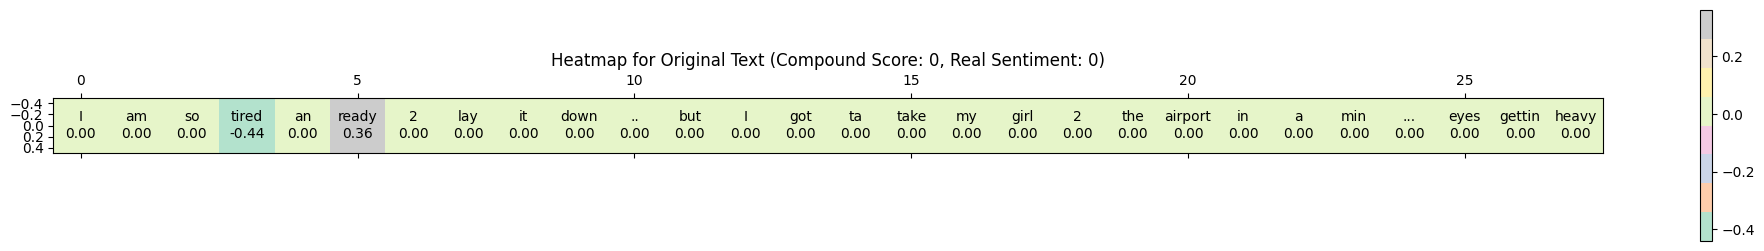

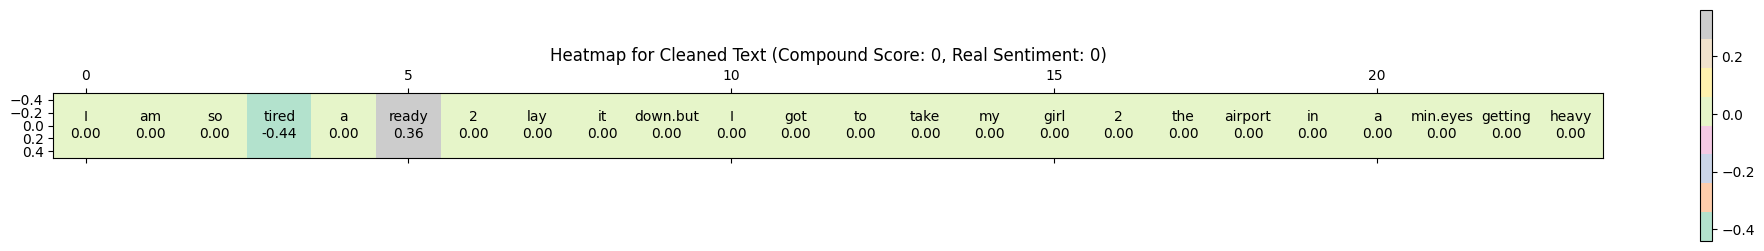

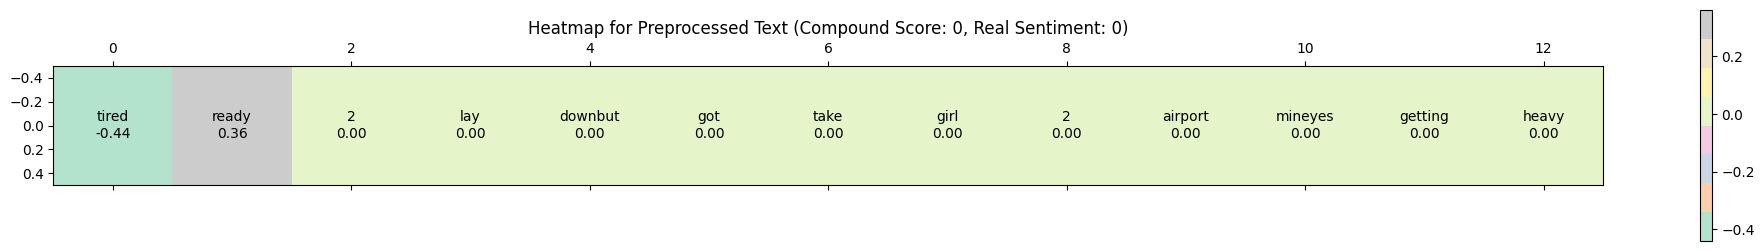

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Sélectionner une ligne au hasard
index = data.sample(1).index[0]
text_original = data.loc[index, 'text']
text_cleaned = data.loc[index, 'cleaned_text']
tokenized_cleaned = data.loc[index, 'tokenized']
text_preprocessed = data.loc[index, 'preprocessed_text']
tokenized_preprocessed = data.loc[index, 'preprocessed_tokenized']
real_sentiment = data.loc[index, 'sentiment_score']  # Sentiment réel

# Initialiser SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def generate_heatmap(text, words, title, real_sentiment):
    """ Pour un texte d'origine et sa version tokenisée
        fournit une carte de chaleur de chaque token
        et la polarité du texte par moyennage
        (0: sentiment négatif, 1: sentiment positif)
    """
    # Obtenir les scores de polarité pour chaque mot dans la phrase
    scores = [sia.polarity_scores(word)['compound'] for word in words]
    
    # Convertir les scores en tableau numpy
    x = np.array([scores])
    
    # Calculer le score global avec un arrondi
    polarity_scores = sia.polarity_scores(text)
    compound_score = round((polarity_scores['compound'] + 1) / 2)
    
    # Créer la heatmap
    fig, ax = plt.subplots(figsize=(25, 3))
    cax = ax.matshow(x, cmap="Pastel2")
    
    # Ajouter les annotations
    for (i, j), val in np.ndenumerate(x):
        ax.text(j, i, f"{words[j]}\n{val:.2f}", ha='center', va='center')
    
    # Ajouter une barre de couleur
    fig.colorbar(cax)
    
    # Ajouter un titre incluant le sentiment réel
    plt.title(f'{title} (Compound Score: {compound_score}, Real Sentiment: {real_sentiment})')
    plt.show()

# Générer les heatmaps pour chaque colonne
# Pour le texte original, on utilise word_tokenize
words_original = word_tokenize(text_original)
generate_heatmap(text_original, words_original, "Heatmap for Original Text", int(real_sentiment / 4))

# Pour cleaned_text, on utilise la colonne tokenized
generate_heatmap(text_cleaned, tokenized_cleaned, "Heatmap for Cleaned Text", int(real_sentiment / 4))

# Pour preprocessed_text, on utilise la colonne preprocessed_tokenized
generate_heatmap(text_preprocessed, tokenized_preprocessed, "Heatmap for Preprocessed Text", int(real_sentiment / 4))


##### Fonction donnant le score sia depuis une colonne de dataframe

In [80]:
import numpy as np
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

def sentiment_scores(df, column_name):
    """Pour une colonne d'un dataframe
       fournit le score de sentiment du texte
       (1: sentiment négatif, 0: sentiment positif)
    """    
    
    # Initialiser SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Fonction pour obtenir le score de polarité inversé (1 pour négatif, 0 pour positif)
    def get_inverted_compound_score(text):
        polarity_scores = sia.polarity_scores(text)
        compound_score = (1 - ((polarity_scores['compound'] + 1) / 2))  # Inversion de l'échelle
        return compound_score

    # Appliquer la fonction à la colonne spécifiée du DataFrame et retourner les scores
    scores = df[column_name].apply(get_inverted_compound_score)
    return scores

In [81]:
import time

# Mesurer le temps de début
start_time = time.time()

# Obtenir les scores de sentiment
scores_raw_text = sentiment_scores(data, "text")

# Mesurer le temps de fin et calculer la durée
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Temps de calcul pour scores_raw_text: {elapsed_time:.4f} secondes")

Temps de calcul pour scores_raw_text: 2.0149 secondes


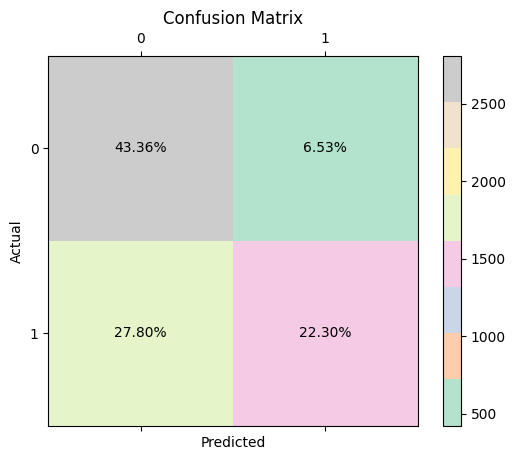

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.87      0.72      3230
           1       0.77      0.45      0.57      3244

    accuracy                           0.66      6474
   macro avg       0.69      0.66      0.64      6474
weighted avg       0.69      0.66      0.64      6474



In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Arrondi des scores pour comparer avec target
sentiment_raw_text = round(scores_raw_text)

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], sentiment_raw_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], sentiment_raw_text)
print("Classification Report:\n", report)


In [83]:
scores_preprocessed_text = sentiment_scores(data, "preprocessed_text")
# Arrondi des scores pour comparer avec target
sentiment_preprocessed_text = round(scores_preprocessed_text)

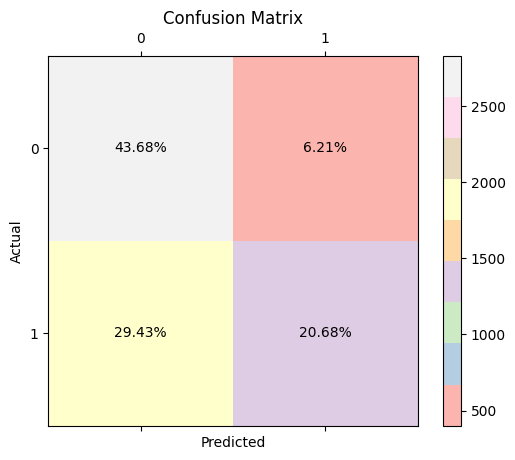

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.88      0.71      3230
           1       0.77      0.41      0.54      3244

    accuracy                           0.64      6474
   macro avg       0.68      0.64      0.62      6474
weighted avg       0.68      0.64      0.62      6474



In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], sentiment_preprocessed_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel1")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], sentiment_preprocessed_text)
print("Classification Report:\n", report)


Avec un seuil du score à 0.5 (round) il est beaucoup plus difficile de détecter un sentiment négatif qu'un sentiment positif. L'accuracy moyenne est légèrement meilleure pour le texte brut par rapport au texte pré-traité.

#### Spacy TextBlob
TextBlob fonctionne avec un dictionnaire où les mots sont enregistrés avec leur connotation positive/négative.

In [86]:
import pandas as pd
from textblob import TextBlob

def analyse_sentiments_textblob(df, column_name):
    """Calcule les scores de sentiment en inversant l'échelle de TextBlob 
       (1 : sentiment négatif, 0 : sentiment positif)
    """
    
    # Fonction pour obtenir le score de sentiment avec l'échelle inversée
    def get_inverted_sentiment_score(text):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        score = 1 - ((polarity + 1) / 2)  # Inversion de l'échelle
        return score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    sentiment_score = df[column_name].apply(get_inverted_sentiment_score)
    
    return sentiment_score

In [87]:
# Mesurer le temps de début
start_time = time.time()

# Obtenir les scores de sentiment
scores_raw_textblob = analyse_sentiments_textblob(data, 'text')

# Mesurer le temps de fin et calculer la durée
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Temps de calcul pour scores_raw_textblob: {elapsed_time:.4f} secondes")

Temps de calcul pour scores_raw_textblob: 2.6229 secondes


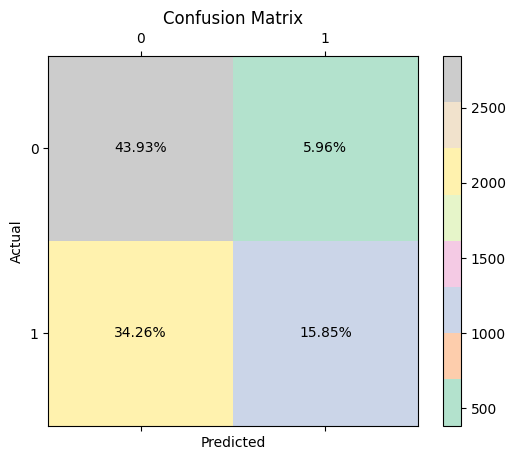

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.88      0.69      3230
           1       0.73      0.32      0.44      3244

    accuracy                           0.60      6474
   macro avg       0.64      0.60      0.56      6474
weighted avg       0.64      0.60      0.56      6474



In [88]:
# Arrondi pour comparer avec target
sentiment_raw_textblob = round(scores_raw_textblob)

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], sentiment_raw_textblob)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], sentiment_raw_textblob)
print("Classification Report:\n", report)

<div class="alert alert-block alert-danger">
    <b>Le calcul de NLTK (utilisant VADER, outil spécifiquement élaboré pour l'analyse de tweets) est plus rapide que TextBlob avec un meilleur taux de faux négatifs. On peut bien sûr ajuster le seuil de détection pour les minimiser mais l'exactitude de prédiction restera au même niveau. Considérons plutôt qu'il s'agit d'une baseline. A noter également que VADER n'a pas besoin de l'ensemble des pré-traitements que nous avons effectués ; au contraire ils dégradent légèrement le résultat. Nous allons ajouter la colonne des scores sia qui pourra éventuellement être utilisée en complément de modèles plus avancés.</b>
</div>

In [89]:
data["sia_sentiment"] = scores_raw_text

### Sauvegarde de la baseline dans MLFlow (approche classique)

In [91]:
# Enregistrement de la baseline dans l'approche classique
import mlflow

In [92]:
print("MLflow version:", mlflow.__version__)
print("MLflow location:", mlflow.__file__)

MLflow version: 2.17.0
MLflow location: c:\ProgramData\anaconda3\envs\aiep7\Lib\site-packages\mlflow\__init__.py


In [93]:
# Asignation du serveur de tracking MLFlow
mlflow.set_tracking_uri("http://localhost:5000")
# Création de l'expérimentation "approche classique"
mlflow.set_experiment("approche_classique")

<Experiment: artifact_location='mlflow-artifacts:/374735653194037029', creation_time=1729108772155, experiment_id='374735653194037029', last_update_time=1729108772155, lifecycle_stage='active', name='approche_classique', tags={}>

In [94]:
import mlflow
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Arrondi des scores pour comparer avec target
sentiment_raw_text = round(scores_raw_text)

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], sentiment_raw_text)

# Démarrer un run MLflow
with mlflow.start_run(run_name="Baseline (SentimentIntensityAnalysis)"):

    # Enregistrer la matrice de confusion sous forme d'image dans MLflow
    fig, ax = plt.subplots()
    cax = ax.matshow(cm, cmap="Pastel2")
    
    # Ajouter les annotations pour chaque cellule avec le nombre d'individus
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f"{val}", ha='center', va='center')  # Affiche le nombre au lieu du pourcentage
    
    # Ajouter une barre de couleur et des titres
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Sauvegarder la figure temporairement
    fig.savefig("confusion_matrix.png")
    
    # Logger l'image dans MLflow
    mlflow.log_artifact("confusion_matrix.png")
    
    # Fermer la figure pour libérer la mémoire
    plt.close(fig)
    
    # Générer et enregistrer le rapport de classification
    report = classification_report(data['target'], sentiment_raw_text)
    
    # Sauvegarder le rapport de classification dans MLflow en tant que texte
    with open("classification_report.txt", "w") as f:
        f.write(report)
    
    mlflow.log_artifact("classification_report.txt")
    
    # Vous pouvez également logger les métriques principales si besoin
    # (par exemple, F1-score, précision, rappel pour chaque classe)
    metrics = classification_report(data['target'], sentiment_raw_text, output_dict=True)
    for label, metric_dict in metrics.items():
        if isinstance(metric_dict, dict):  # éviter les 'accuracy', etc.
            for metric, score in metric_dict.items():
                mlflow.log_metric(f"{label}_{metric}", score)
    
    # Indiquer la fin du run
    print("Matrice de confusion et rapport de classification enregistrés dans MLflow.")


2024/12/15 09:35:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Baseline (SentimentIntensityAnalysis) at: http://localhost:5000/#/experiments/374735653194037029/runs/90d17040b22d484cb48c2c727e411ffc.
2024/12/15 09:35:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/374735653194037029.


Matrice de confusion et rapport de classification enregistrés dans MLflow.


### Préparation des données à la modélisation

Nous allons comparer les performances des modèles le jeu de données séparé en train/val/test.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Echantillonage
df_sample, test_df = train_test_split(data, test_size=0.25, stratify=data["target"])

In [96]:
df_sample.shape

(4855, 15)

In [97]:
# Séparation en train/test
train_df, val_df = train_test_split(df_sample, test_size=0.3, stratify=df_sample['target'])

print("Taille de l'ensemble d'entraînement :", len(train_df))
print("Taille de l'ensemble de validation :", len(val_df))
print("Taille de l'ensemble de test :", len(test_df))

Taille de l'ensemble d'entraînement : 3398
Taille de l'ensemble de validation : 1457
Taille de l'ensemble de test : 1619


In [98]:
train_df.head(5)

,target,ids,date,flag,user,text,sentiment_score,cleaned_text,tokenized,preprocessed_text,preprocessed_tokenized,length_text,length_tokenized,length_preprocessed_tokenized,sia_sentiment
129055,1,1835026472,Mon May 18 04:56:00 PDT 2009,NO_QUERY,Kelliekk,@letoackles Family Remains. Were a bit delayed here in the land down under They only just put it back on tv. Big delay between eps.,0,<mention> Family Remains. Were a bit delayed here in the land down under They only just put it back on TV. Big delay between EPs.,"[<mention>, Family, Remains, ., Were, a, bit, delayed, here, in, the, land, down, under, They, only, just, put, it, back, on, TV, ., Big, delay, between, EPs, .]",<mention> family remains bit delayed land put back tv big delay eps,"[<mention>, family, remains, bit, delayed, land, put, back, tv, big, delay, eps]",132,28,12,0.74695
1104998,0,1971232209,Sat May 30 06:34:47 PDT 2009,NO_QUERY,AmariLovely,@shirtlessrob I hope you have/had a nice flight. Please stay in touch-you are super fun! TY again for sharing so many good times...xoxo,4,<mention> I hope you have/had a nice flight. Please stay in touch-you are super fun! TY again for sharing so many good times.too,"[<mention>, I, hope, you, have/had, a, nice, flight, ., Please, stay, in, touch-you, are, super, fun, !, TY, again, for, sharing, so, many, good, times.too]",<mention> hope havehad nice flight please stay touchyou super fun ! ty sharing many good timestoo,"[<mention>, hope, havehad, nice, flight, please, stay, touchyou, super, fun, !, ty, sharing, many, good, timestoo]",137,25,16,0.01275
190195,1,1969302039,Fri May 29 23:36:45 PDT 2009,NO_QUERY,myglasseye,"Walked into work, called &quot;Good morning!&quot; to everyone in reception, was ignored by ALL the production staff. Only crew replied. So rude.",0,"Walked into work, called ""Good morning!"" to everyone in reception, was ignored by ALL the production staff. Only crew replied. So rude.","[Walked, into, work, ,, called, ``, Good, morning, !, '', to, everyone, in, reception, ,, was, ignored, by, ALL, the, production, staff, ., Only, crew, replied, ., So, rude, .]",walked work called good morning ! everyone reception ignored production staff crew replied rude,"[walked, work, called, good, morning, !, everyone, reception, ignored, production, staff, crew, replied, rude]",146,30,14,0.85410
712486,1,2258542017,Sat Jun 20 16:05:38 PDT 2009,NO_QUERY,theseanasaurus,"Big rain delay at Bethpage - maybe that'll help Tiger, he needs to make a move fast.",0,"Big rain delay at Beth page - maybe that will help Tiger, he needs to make a move fast.","[Big, rain, delay, at, Beth, page, -, maybe, that, will, help, Tiger, ,, he, needs, to, make, a, move, fast, .]",big rain delay beth page maybe help tiger need make move fast,"[big, rain, delay, beth, page, maybe, help, tiger, need, make, move, fast]",85,21,12,0.44865
177233,1,1965569212,Fri May 29 16:09:08 PDT 2009,NO_QUERY,saint0z,@Jovani_Celeste how long is the delay?,0,<mention> how long is the delay?,"[<mention>, how, long, is, the, delay, ?]",<mention> long delay ?,"[<mention>, long, delay, ?]",39,7,4,0.65910


In [99]:
# Sauvegarde des dataframe train, val et test
train_df.to_csv('./data/train_df.csv', index=False)
test_df.to_csv('./data/test_df.csv', index=False)
val_df.to_csv('./data/val_df.csv', index=False)

In [100]:
# Sauvegarde des dataframes simplifiés pour AutoML (analyse du langage naturel)
train_df_simple = train_df[["text", "target"]]
train_df_simple.to_csv('./data/train_data_autoML.csv', index=False)
test_df_simple = test_df[["text", "target"]]
test_df_simple.to_csv('./data/test_data_autoML.csv', index=False)
val_df_simple = val_df[["text", "target"]]
val_df_simple.to_csv('./data/val_data_autoML.csv', index=False)

In [101]:
import os
from datetime import datetime

# Chemin vers le fichier notebook
notebook_path = "P7_preprocessing.ipynb"  

# Obtenir la dernière date de modification
last_saved = datetime.fromtimestamp(os.path.getmtime(notebook_path))
print(f"La dernière sauvegarde du notebook est : {last_saved}")



La dernière sauvegarde du notebook est : 2024-12-15 09:01:39.386724
